In [26]:
import pdb
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from helper import DataHelper
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3> Pandas Data Frame 으로 파일 불러오기</h3>

이번 버젼부터는 3Secondz 기본 포맷인 STD_xxxxx.csv에 맞추어 동작합니다.
SCZ_sample.csv 와 컬럼명이 다를 수 있으니 주의해주세요.

In [27]:
datafile = 'std_001.csv'

df = pd.read_csv(datafile)

std 포맷의 파일의 경우 다음과 같이 초기화 할 수 있습니다.

In [42]:
dh = DataHelper(df)
print(vars(dh).keys())

dict_keys(['origin', 'df', 'localX', 'localY', 'distance', 'curvature', 'speed', 'heading', 'timestamp', 'interval'])


Preview 함수는 원본 dataframe과 같은 field를 리턴하며,
추가적으로 

<b>PreviewX, PreviewY, Curvature, Distance</b>

값들을 리턴합니다

In [29]:
dh.set_preview_time(1)
ind=1
res = dh.get_preview(ind, 'TIME')
print(res.keys())

dict_keys(['Distance', 'PosLocalX', 'PosLocalY', 'InverseRadius', 'RefinedPosLon', 'RefinedPosLat', 'TimeStamp', 'GPS_Speed', 'PosLat', 'PosLon', 'AccelForward', 'AccelLateral', 'DeviceAccelForward', 'DeviceAccelLateral', 'DeviceAccelVertical', 'AngleTrack', 'AngleRateZ', 'GPS_Height', 'GPS_NumSat', 'GPS_PosAccuracy', 'RPM', 'Steer_angle', 'Gear', 'OilT', 'Internal Batte', 'External Batte', 'ECU_THROTTLE', 'ECU_ENG_TMP', 'ECU_WS_FL', 'ECU_WS_FR', 'ECU_WS_RL', 'ECU_WS_RR', 'ECU_PEDAL', 'ECU_MAF', 'ECU_BRK_PRES', 'ECU_STEER_SPD', 'ECU_TCS_ESP', 'ECU_V_BATTERY', 'GPS_Slope', 'GPS_Elevation', 'PositionIndex', 'LapNo', 'PositionHeight', 'AccelX', 'AccelY', 'AccelCombined', 'HP_est', 'Pedal_throttle', 'Origin_Steer_angle', 'GripUsage', 'Pedal_brake', 'Origin_Gear', 'Origin_RPM', 'PreviewX', 'PreviewY', 'Curvature'])


<h3> Time 기반 프리뷰 사용하는 경우

<IPython.core.display.Javascript object>


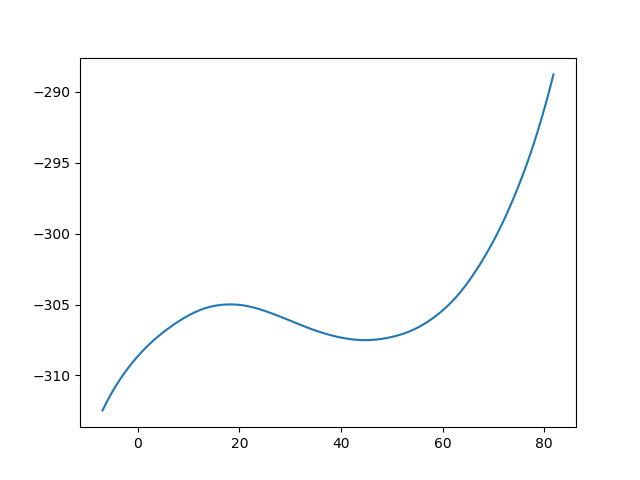

<IPython.core.display.Javascript object>


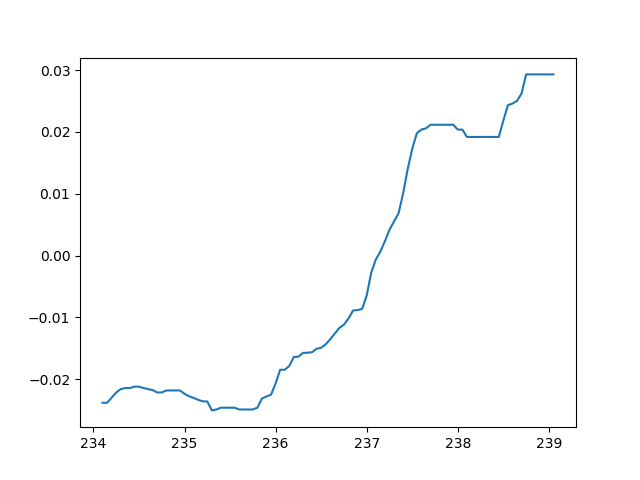

<IPython.core.display.Javascript object>


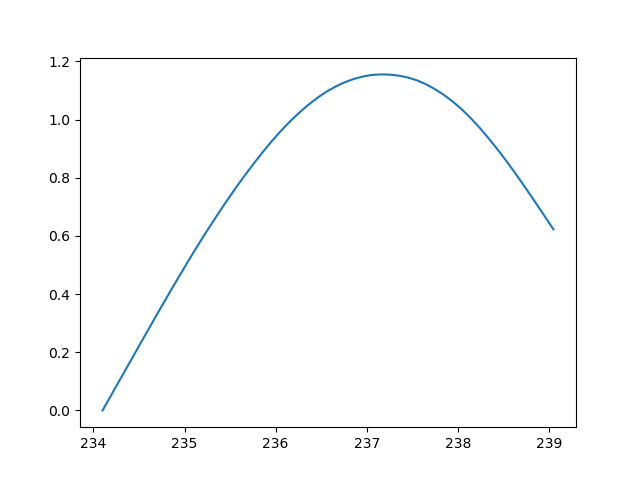

<IPython.core.display.Javascript object>


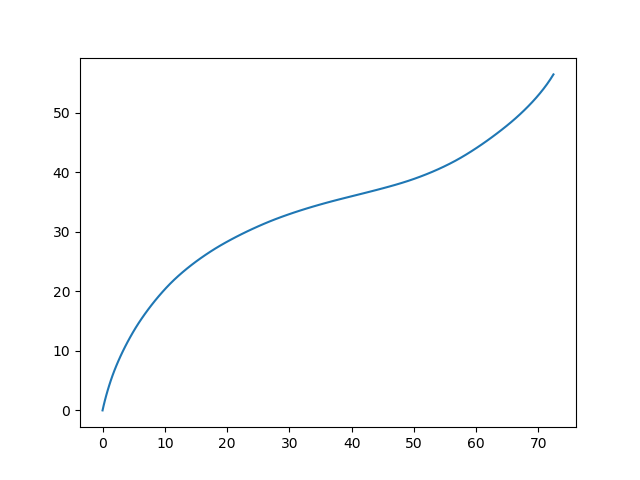

In [54]:
dh.set_preview_time(5.0) # 3초 preview
ind = 1400 # Preview 시작할 index
res = dh.get_preview(ind, 'TIME')

plt.figure()
plt.plot(res['PosLocalX'], res['PosLocalY'])
plt.figure()
plt.plot(res['TimeStamp'],res['Curvature'])
plt.figure()
plt.plot(res['TimeStamp'],res['AngleTrack'])
plt.figure()
plt.plot(res['PreviewY'], res['PreviewX'])

<h3>Distance Preview

<IPython.core.display.Javascript object>


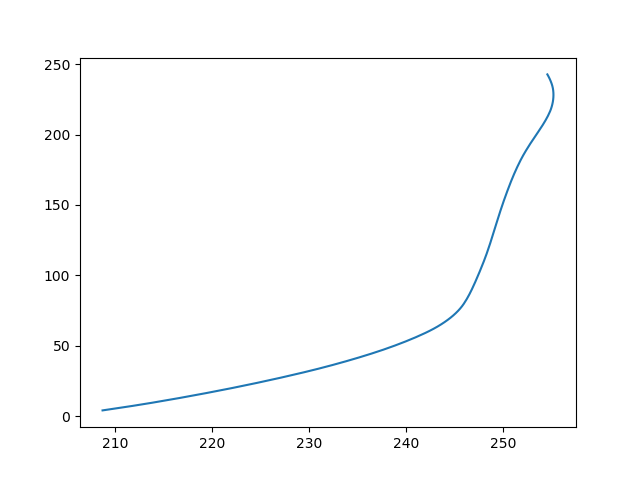

<IPython.core.display.Javascript object>


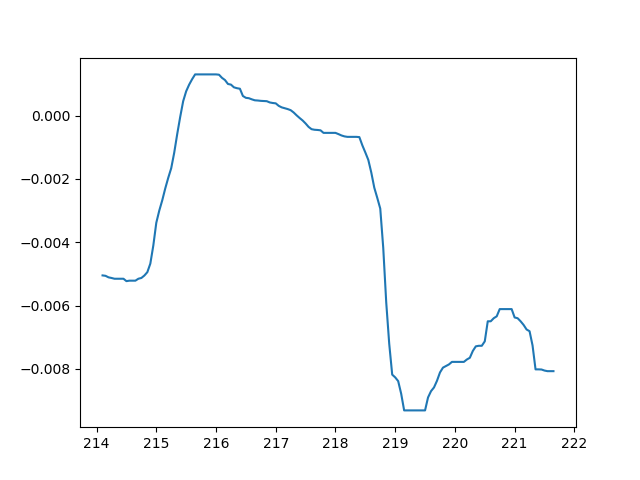

<IPython.core.display.Javascript object>


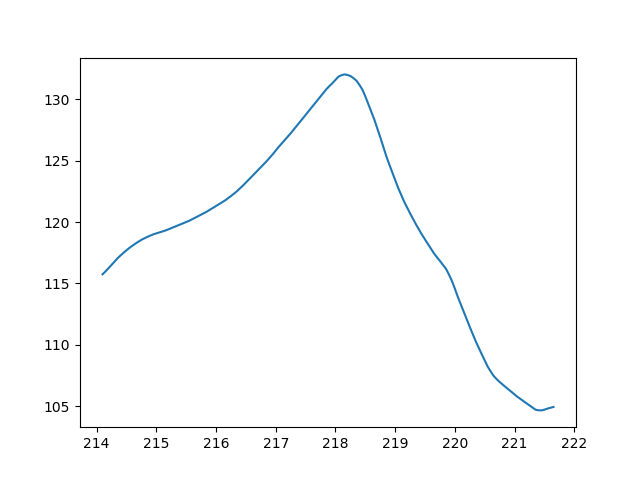

In [30]:
dh.set_preview_distance(250.0) # 250m preview
ind = 1000 # Preview 시작할 index
res = dh.get_preview(ind, 'DISTANCE')

plt.figure()
plt.plot(res['PosLocalX'], res['PosLocalY'])
plt.figure()
plt.plot(res['TimeStamp'],res['Curvature'])
plt.figure()
plt.plot(res['TimeStamp'],res['GPS_Speed'])

### AngleTrack 없는 데이터의 경우

dict_keys(['origin', 'df', 'localX', 'localY', 'distance', 'curvature', 'speed', 'heading', 'timestamp', 'interval'])


<IPython.core.display.Javascript object>


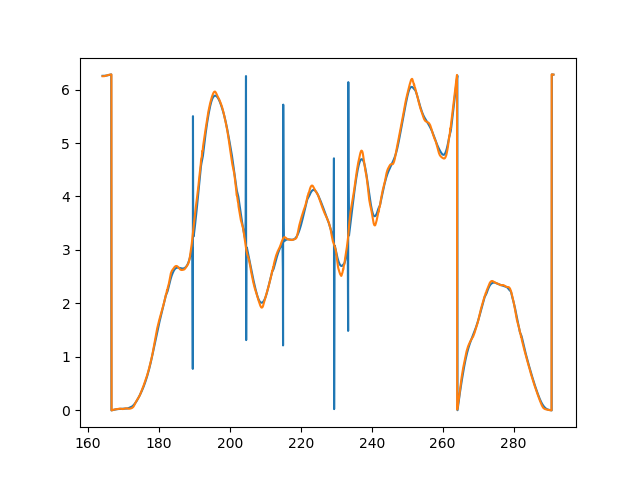

In [50]:
dh_wo = DataHelper(df.drop(columns = 'AngleTrack'))
print(vars(dh).keys())
plt.figure()
plt.plot(dh.timestamp, dh.heading, dh_wo.timestamp, dh_wo.heading)

<IPython.core.display.Javascript object>


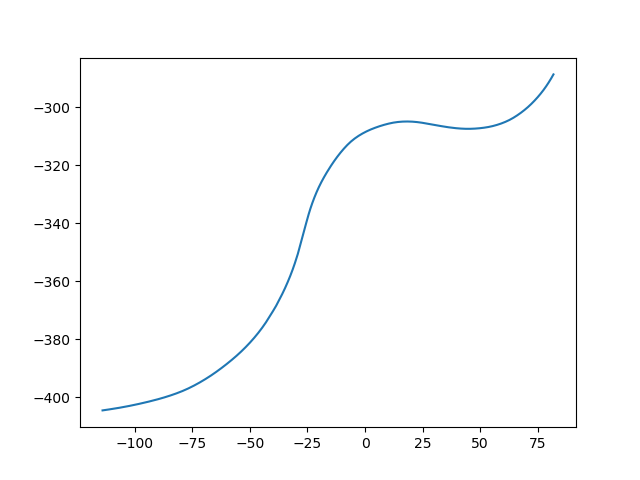

<IPython.core.display.Javascript object>


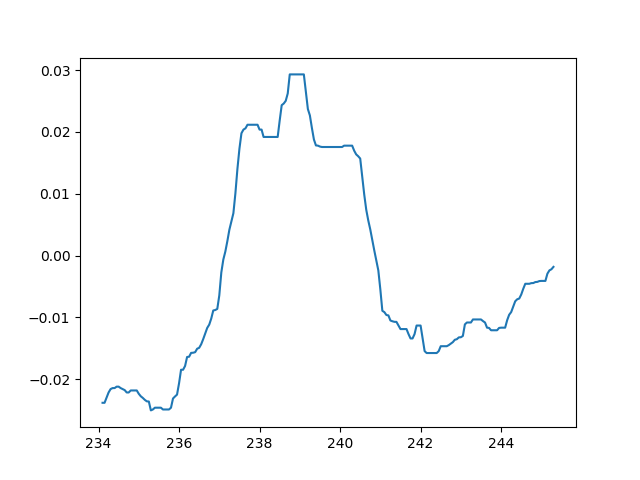

<IPython.core.display.Javascript object>


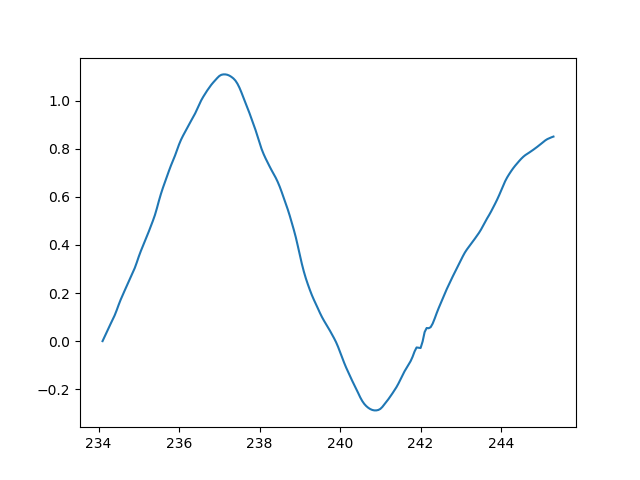

<IPython.core.display.Javascript object>


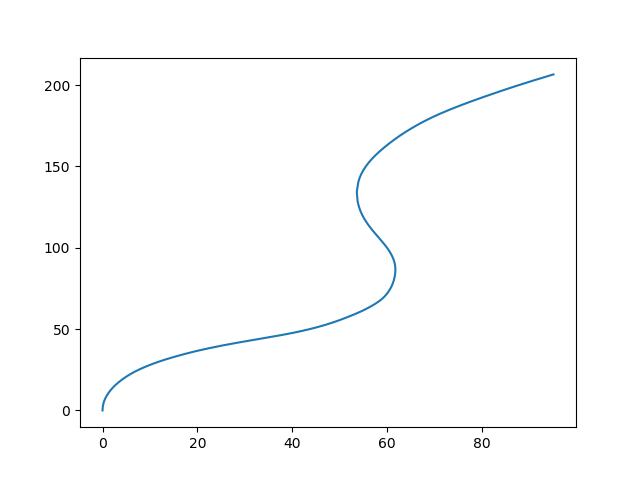

In [55]:
dh_wo.set_preview_distance(250.0) # 250m preview
ind = 1400 # Preview 시작할 index
res = dh_wo.get_preview(ind, 'DISTANCE')

plt.figure()
plt.plot(res['PosLocalX'], res['PosLocalY'])
plt.figure()
plt.plot(res['TimeStamp'],res['Curvature'])
plt.figure()
plt.plot(res['TimeStamp'],res['AngleTrack'])
plt.figure()
plt.plot(res['PreviewY'], res['PreviewX'])